In [1]:
import pandas as pd
import numpy as np
import logging
from io import StringIO
import logging

import scipy.interpolate as spi
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.lib.units import cm
from reportlab.platypus import Table
from reportlab.lib import colors
from reportlab.platypus import TableStyle

In [2]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes as monitoreo

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Create a string buffer to capture log output
log_capture_string = StringIO()
ch = logging.StreamHandler(log_capture_string)
ch.setLevel(logging.INFO)
logger.addHandler(ch)

%load_ext kedro.ipython

params1= catalog.list
params = catalog.load("parameters")
#params

### Construccion de metricas historicas:

In [5]:
prod = 'CDT'
rezago_pred = 2

In [6]:
params = {}

params['ruta_insumo_monitoreo'] = f's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/{prod}/09-backtesting/'
params['archivo_360'] = {
    '202412':'insumo_modelo_360_new_mvp7_4_202412.pickle',
    '202503':'insumo_modelo_360_new_mvp7_4_202503_v_retail.pickle',
    '202504':'insumo_modelo_360_new_mvp7_4_202504_v_retail.pickle',
    '202505':'insumo_modelo_360_new_mvp7_4_202505_v_retail.pickle',
    '202506':'insumo_modelo_360_new_mvp7_4_202506_v_retail.pickle'
    }

params['archivo_backtesting'] = {
    '202412':'save_backtesting_new_mvp7_4_202412.pickle',
    '202503':'save_backtesting_new_mvp7_4_202503_v_retail.pickle',
    '202504':'save_backtesting_new_mvp7_4_202504_v_retail.pickle',
    '202505':'save_backtesting_new_mvp7_4_202505_v_retail.pickle',
    '202506':'save_backtesting_new_mvp7_4_202506_v_retail.pickle'
}

In [7]:
params['x_name'] = 'Corte'
params['y_name'] = 'N'
params['z_name'] = '% Aciertos'
params['rezago'] = rezago_pred
params['sd_aceptabilidad'] = 3 # en desviaciones estandar
params['nodos_curva']  = [40.000,80.000,0.1,0.2,0.3,1]
params['n_cortes_ventana_cp'] = 2
params['n_cortes_ventana_lp'] = 4
params['product'] = prod

In [8]:
params['Alerta_drawdown'] = -15 # cifra *100
params['figsize_drift_cp_datos'] = [15,8]
params['figsize_mantenimiento'] = [15,7]

In [9]:
params['column_pend'] = params['z_name'] #% Aciertos,Aciertos, % Aciertos x Cliente.
params['tipo'] =  "Freq Producto" # 'ID', 'Freq Producto'
params['n_mult'] = 1000 # magnitud en que la pendiente se ve afectada: pendiente = df[column_pend].diff() / (df['N'].diff()/n_mult)

In [10]:
tickets,metrics = monitoreo.extraer_metricas(params)

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Ok insumo de ordenamiento para el corte 202412
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Construyendo monitoreo para seguir un rezago de  1 cortes
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Construyendo monitoreo para seguir un rezago de  2 cortes
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Construyendo monitoreo para seguir un rezago de  3 cortes
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Construyendo monitoreo para seguir un rezago de  Combined cortes
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:------------------
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Ok insumo de ordenamiento para el corte 202503
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Añadiendo 202503 con el rezago 1 dentro del monitoreo 
INFO:data_bbog_integration_fabric

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:El parametro del numero de cortes de la ventana de largo plazo es mas grande que el set de observabilidad del modelo y se utilizaran todos los cortes...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando las medias y desviaciones estandar moviles
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Extrayendo las metricas moviles del corte: 202505 previo al corte actual: 202506
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando el nivel de alerta del modelo


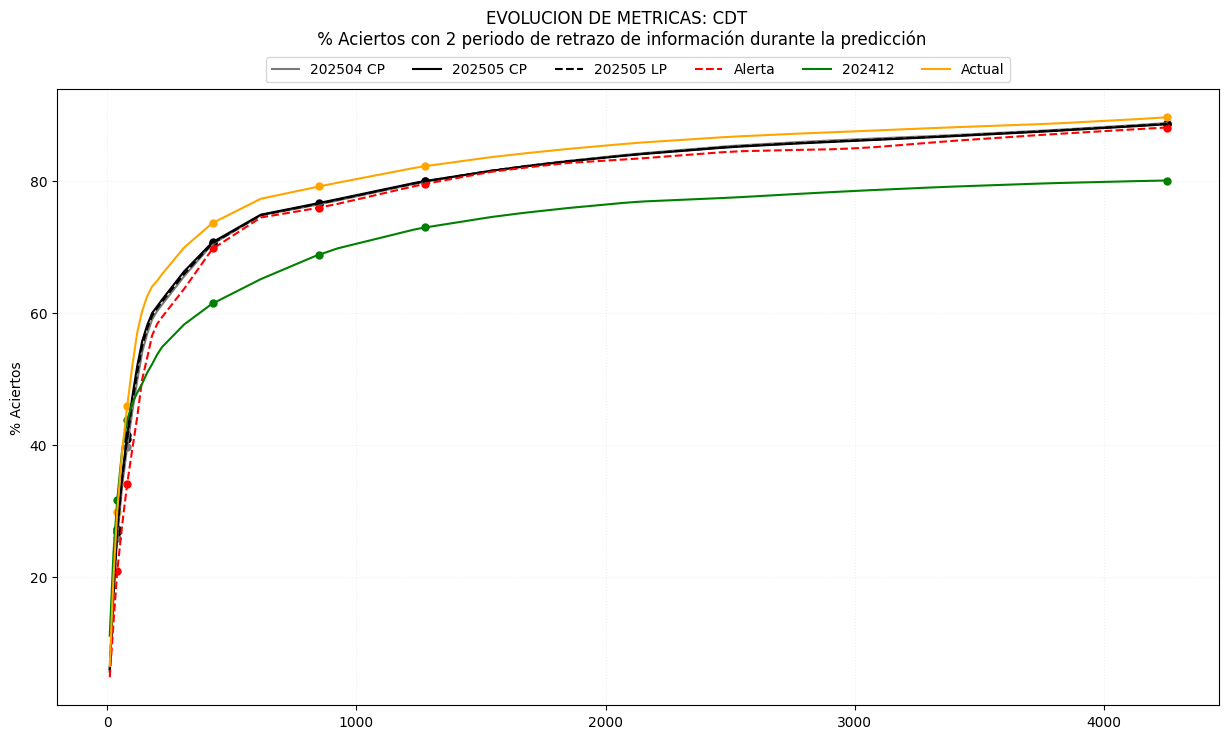

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Añadiendo las graficas sobre los cambios en los datos
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Iniciando el analisis en los cambios de la estructura de los datos...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Identificando los nodos del ordenamiento que tienen una tendencia decreciente (ventana corta de 2 periodos inferior a la ventana larga de 4 periodos).
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando el cambio porcentual entre el ultimo Backtesting generado vs la ventana corta con 2 periodos...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:El movimiento en el corto plazo corresponde al 1.2% bajo la visual de todo el set de datos, el cual se atribuye a negocio
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Y el movimiento de la metrica atribuible al modelo (en los nodos de ordenami

N,40.000,80.000,425.145,850.291,1275.437,4251.458
% Aciertos,9.71,10.44,4.1,3.26,2.82,1.2


INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:No identificamos deterioro en ningun nodo del ordenamiento en el corto plazo
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:--------
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando el cambio porcentual entre el ultimo Backtesting generado vs el nivel de la alerta permitido y evaluando alertas de deterioro...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:No hubo alerta generada
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Diagnostico del modelo:
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:OK. Modelo Eficiente!
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Añadiendo los mensajes sobre los cambios en los datos


In [11]:
pdf_drift,windows_metrics,nodes_target,drift_alert = monitoreo.eval_alertas_cambio_estructural_de_datos(metrics,tickets,params)

In [12]:
drift_alert

False

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando o añadiendo las graficas sobre el mantenimiento del modelo


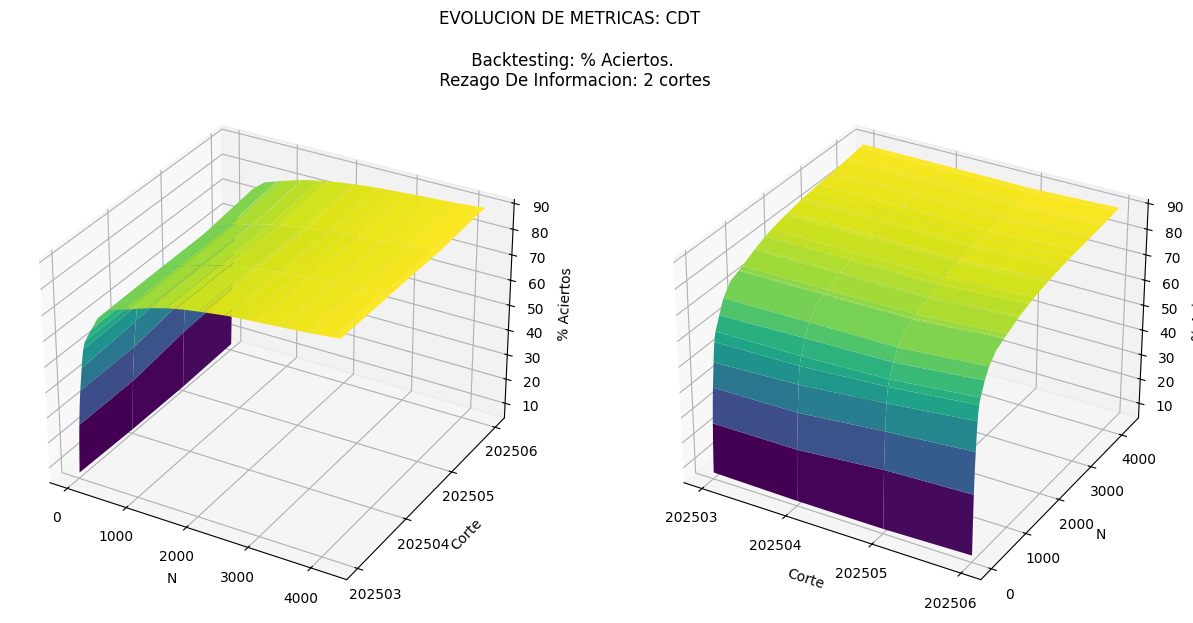

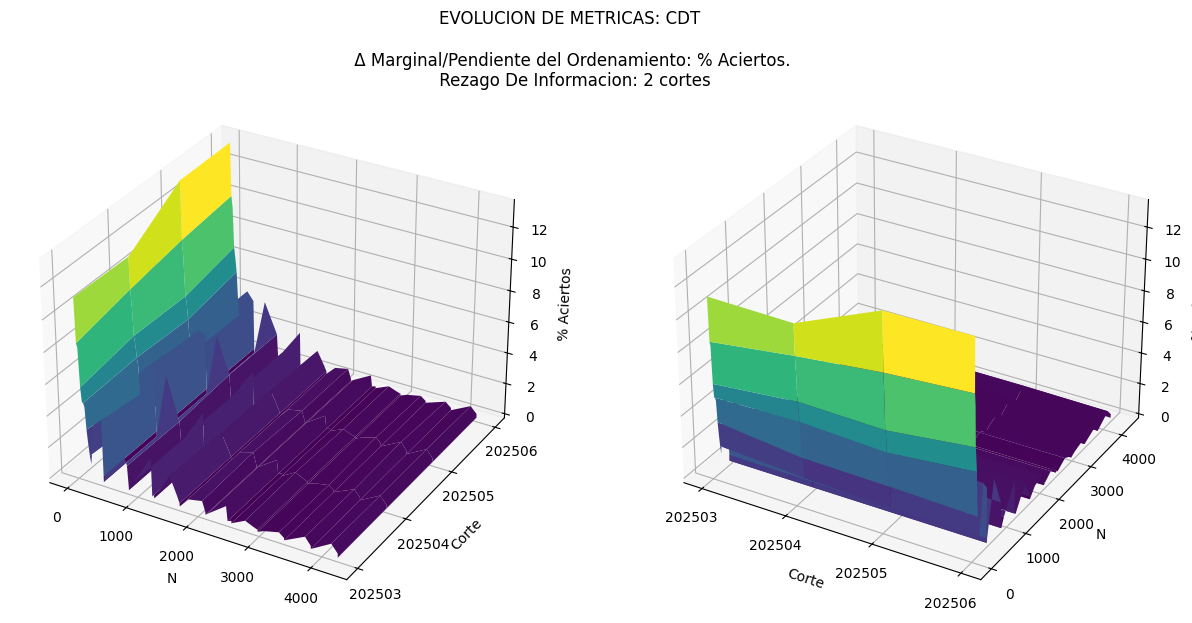

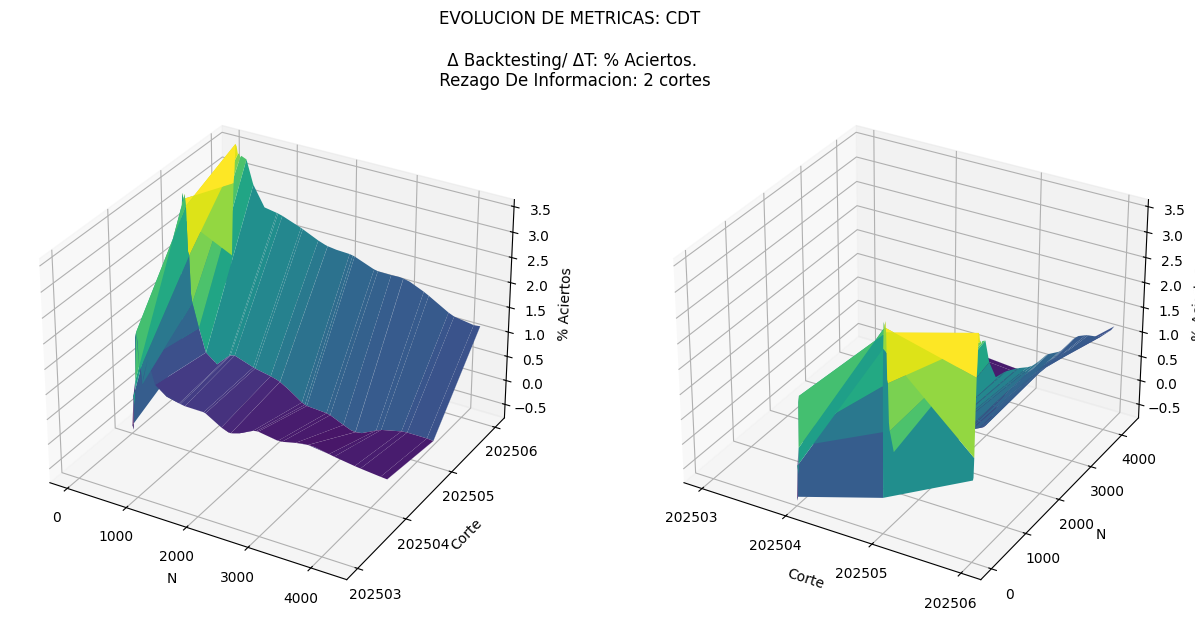

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Iniciando el calculo de metricas Drawdown...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Comparando metricas actuales vs metricas desde la fecha de producción...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando metricas actuales vs 2,4 periodos ...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Añadiendo los mensajes sobre el mantenimiento del modelo
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Alerta: Drawdown superior al restringido -15% en algunos nodos de la curva de ordenamiento:


% Δ CDT,Actual vs Initial,Actual vs μ 2 periods,Actual vs μ 3 periods
N,,,


INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Analizando el drawdown en los nodos de interes...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Ok modelo sin requerir recalibracion!
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:No hubo alerta de Drawdown en ningun nodo de interes ya que no supero el restringido -15%


% Δ CDT,Actual vs Initial,Actual vs μ 2 periods,Actual vs μ 3 periods
N,,,
40.000,-5.658034,0.0,0.0
80.000,0.000000,0.0,0.0
425.145,0.000000,0.0,0.0
850.291,0.000000,0.0,0.0
1275.437,0.000000,0.0,0.0


In [13]:
pdf_drift_sustainability,sustainability_alert = monitoreo.eval_alertas_drawdown(pdf_drift,windows_metrics,metrics,tickets,nodes_target,params)

In [14]:
sustainability_alert

False

In [15]:
params['estructura_pdf'] = {
            'ruta_monitoreo': f'/home/sagemaker-user/data-bbog-integration-fabrica-personas/notebooks/Monitoreo/',
            'nombre_pdf': f'monitoreo_{prod}.pdf',
            'start_text_cm': 27,
            'margen_sup_inf_cm':2,
            'renglon_cm':1,
            'margen_izq_cm': 2,
            'y_graph_cm': 5, # altura de la posicion de la imagen en la hoja
            'width_graph_cm' : 24, # anchura maxima de la imagen sin distorcion
            'height_graph_cm': 24, # largura maxima de la imagen sin distorcion
            'margen_izq_graph_cm': -1.5,
        }

In [16]:
msj = monitoreo.generar_reporte_pdf(pdf_drift_sustainability,params)

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:PDF generado en: /home/sagemaker-user/data-bbog-integration-fabrica-personas/notebooks/Monitoreo//monitoreo_CDT.pdf


In [17]:
msj